In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving odev_tenis.csv to odev_tenis.csv


In [3]:
import io
veriler = pd.read_csv(io.BytesIO(uploaded['odev_tenis.csv']))
veriler

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [4]:
from sklearn.preprocessing import LabelEncoder
veriler2 = veriler.apply(LabelEncoder().fit_transform)

c = veriler2.iloc[:,:1]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
c=ohe.fit_transform(c).toarray()
print(c)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [5]:
"""
play = veriler.iloc[:,-1:].values
windy = veriler.iloc[:,3:4].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
play[:,-1] = le.fit_transform(veriler.iloc[:,-1])
play
windy[:,-1] = le.fit_transform(veriler.iloc[:,3:4])
windy
"""

'\nplay = veriler.iloc[:,-1:].values\nwindy = veriler.iloc[:,3:4].values\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder()\nplay[:,-1] = le.fit_transform(veriler.iloc[:,-1])\nplay\nwindy[:,-1] = le.fit_transform(veriler.iloc[:,3:4])\nwindy\n'

In [7]:
havadurumu = pd.DataFrame(data = c, index = range(14), columns=['o','r','s'])
sonveriler = pd.concat([havadurumu,veriler.iloc[:,1:3]],axis = 1)
sonveriler = pd.concat([veriler2.iloc[:,-2:],sonveriler], axis = 1)
#sonveriler

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sonveriler.iloc[:,:-1],sonveriler.iloc[:,-1:], test_size = 0.33, random_state = 0)
# ilk array train için 2.cisi tahmin ediceği değer için 

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

In [52]:
import statsmodels.api as sm
X = np.append( arr = np.ones((14,1)).astype(int ), values = sonveriler.iloc[:,:-1],axis=1)


In [56]:
X_l = sonveriler.iloc[:,[1,2,3,4,5]].values
X_l = np.array(X_l, dtype=float)

In [58]:
model = sm.OLS(sonveriler.iloc[:,-1:], X_l).fit()


In [59]:
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Tue, 09 Aug 2022   Prob (F-statistic):              0.546
Time:                        10:28:32   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.2865      6.909     -0.910      0.387     -21.916       9.343
x2            36.6564     39.905      0.919      0.382     -53.615     126.927
x3            41.9135     36.464      1.149      0.280     -40.573     124.400
x4            35.1064     39.339      0.892      0.395     -53.884     124.097
x5             0.6484      0.506      1.282      0.232      -0.496       1.793
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.810
Skew:                           0.424   Prob(JB):                        0.667
Kurtosis:                       2.181   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ValueError: ignored

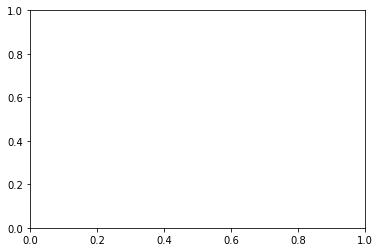

In [63]:
plt.scatter(y_pred, y_test.iloc[)